# **Data Pre-processing**

### **Import Libraries**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

top_features_count = 50
selected_features_count = 50

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Random Seed for Under-sampling, Data-split and Modeling
a = 42
b = 42
c = 42

### **Load Dataset**

In [4]:
# data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data = pd.read_csv('/content/drive/MyDrive/Dataset/5G_SliciNdd_preprocessed.csv')
data.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.0,0.0,0.0,144379.0,URLLC
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,181691.0,URLLC
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,175580.0,URLLC
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.0,0.0,0.0,120239.0,URLLC
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,348612.0,URLLC


In [5]:
data_backup = data
data_backup

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0000,982.000000,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.000,URLLC
1,531568.0000,11362.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.000,URLLC
2,360399.0000,70834.000000,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.000,URLLC
3,30702.0000,440.000000,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.000,URLLC
4,312747.0000,128397.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.000,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.000,64896.00000,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


### **Relevant Feature Selection**

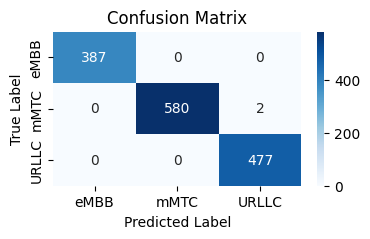

              precision    recall  f1-score   support

       URLLC     1.0000    1.0000    1.0000       387
        eMBB     1.0000    0.9966    0.9983       582
        mMTC     0.9958    1.0000    0.9979       477

    accuracy                         0.9986      1446
   macro avg     0.9986    0.9989    0.9987      1446
weighted avg     0.9986    0.9986    0.9986      1446



In [6]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('SliceType', axis=1)
y = data['SliceType']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)
# y_pred

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, digits=4))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

In [7]:
X.head()

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,DstRate,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,0.000000,1,64128.000,64256.00000,3904203819,3.704605e+09,0.0,0.0,0.0,144379.0
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,0.000000,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,181691.0
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,0.000000,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,175580.0
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,43.465034,1,56960.000,77568.00000,97975463,3.508802e+09,0.0,0.0,0.0,120239.0
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,0.000000,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.0,0.0,0.0,348612.0


In [7]:
top_features = feature_importance['feature'].head(top_features_count).tolist()
# top_features = feature_importance['feature'][start_index:end_index].tolist()
print(top_features)

['Load', 'Rate', 'DstLoad', 'DstRate', 'Loss', 'SrcRate', 'dMeanPktSz', 'SrcLoad', 'pLoss', 'DstBytes', 'TotBytes', 'SrcBytes', 'SrcWin', 'TotPkts', 'SrcLoss', 'SrcPkts', 'DstPkts', 'DstWin', 'SynAck', 'DstLoss', 'dDSb', 'UniqueID', 'State', 'sMeanPktSz', 'Dur', 'Proto', 'Min', 'AckDat', 'X', 'Max', 'Sum', 'RunTime', 'Mean', 'TcpRtt', 'Offset', 'Seq', 'sHops', 'Cause', 'dTtl', 'SrcTCPBase', 'dHops', 'DstTCPBase', 'sTtl', 'dTos', 'sDSb', 'sTos', 'DstGap', 'SrcGap']


In [8]:
print("\n Selecting top features")
X = X[top_features]
X.head()


 Selecting top features


,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,dTtl,SrcTCPBase,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap
0,0.000000,3460.207764,0.00000,0.000000,0.0,0.000000,60.000000,0.000000,0.0,60.0,...,255.000000,3904203819,1.000000,3.704605e+09,250,184.000000,6,224,0,0
1,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,72.421437,1836252122,5.931325,2.446250e+09,249,0.257735,4,0,0,0
2,131.237137,0.390587,0.00000,0.000000,0.0,0.390587,0.000000,131.237137,0.0,0.0,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0
3,84843.742190,108.662582,23297.25781,43.465034,0.0,43.465034,66.666664,61546.484380,0.0,200.0,...,117.000000,97975463,11.000000,3.508802e+09,64,0.000000,4,0,0,0
4,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0


In [9]:
# Select relevant features for clustering
features = top_features
features

['Load',
 'Rate',
 'DstLoad',
 'DstRate',
 'Loss',
 'SrcRate',
 'dMeanPktSz',
 'SrcLoad',
 'pLoss',
 'DstBytes',
 'TotBytes',
 'SrcBytes',
 'SrcWin',
 'TotPkts',
 'SrcLoss',
 'SrcPkts',
 'DstPkts',
 'DstWin',
 'SynAck',
 'DstLoss',
 'dDSb',
 'UniqueID',
 'State',
 'sMeanPktSz',
 'Dur',
 'Proto',
 'Min',
 'AckDat',
 'X',
 'Max',
 'Sum',
 'RunTime',
 'Mean',
 'TcpRtt',
 'Offset',
 'Seq',
 'sHops',
 'Cause',
 'dTtl',
 'SrcTCPBase',
 'dHops',
 'DstTCPBase',
 'sTtl',
 'dTos',
 'sDSb',
 'sTos',
 'DstGap',
 'SrcGap']

#### Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all selected features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution) with selected features')
# plt.show()

### **Class Distribution Analysis**

In [10]:
data = data[features + ['SliceType']]
data

,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,SrcTCPBase,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
0,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,60.000000,...,3904203819,1.000000,3.704605e+09,250,184.000000,6,224,0,0,URLLC
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1836252122,5.931325,2.446250e+09,249,0.257735,4,0,0,0,URLLC
2,131.237137,0.390587,0.000000,0.000000,0.000000,0.390587,0.000000,131.237137,0.000000,0.000000,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
3,84843.742190,108.662582,23297.257810,43.465034,0.000000,43.465034,66.666664,61546.484380,0.000000,200.000000,...,97975463,11.000000,3.508802e+09,64,0.000000,4,0,0,0,URLLC
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2415.138241,3.821267,901.270514,1.594339,2.000000,2.019412,68.162787,1613.406298,10.105935,478.546229,...,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0,mMTC
14452,2471.046868,3.722216,763.222253,1.400239,1.257694,2.029394,67.734197,1553.066132,9.210293,417.788733,...,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0,mMTC
14453,2283.097961,3.840632,855.459521,1.626468,2.000000,2.037339,68.009158,1774.842835,10.360201,520.916319,...,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0,mMTC
14454,2106.446226,3.244096,699.197109,1.408035,1.609694,1.797084,67.815812,1354.903131,7.659634,484.317812,...,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0,mMTC


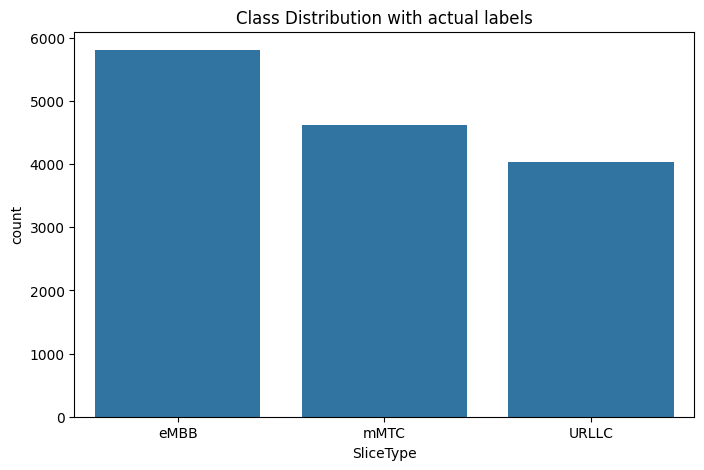

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['SliceType'], order=['eMBB','mMTC','URLLC'])
# plt.title('Class Distribution
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

In [ ]:
# # Create a heatmap for the correlation matrix of all features
# plt.figure(figsize=(14, 8))
# sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
# plt.title('Heatmap (Feature Distribution)')
# plt.show()

#### **Under Sampling - Class Imbalance Issue**

In [24]:
print(a)

42


In [25]:
# Identify the majority class
majority_class1 = data['SliceType'].value_counts().idxmax()
# Count the number of data points in the majority class
majority_count1 = data['SliceType'].value_counts()[majority_class1]

# Identify the second majority class
temp_data = data[data['SliceType'] != majority_class1]
majority_class2 = temp_data['SliceType'].value_counts().idxmax()
# Count the number of data points in the second majority class
majority_count2 = temp_data['SliceType'].value_counts()[majority_class2]

# Count the number of data points in the minority class
minority_count = data['SliceType'].value_counts().min()

# Calculate the number of data points to remove from the majority class
num_to_remove1 = majority_count1 - minority_count
num_to_remove2 = majority_count2 - minority_count

# Randomly select data points from the majority class to remove
majority_indices1 = data[data['SliceType'] == majority_class1].index
remove_indices1 = np.random.choice(majority_indices1, size=num_to_remove1, replace=False)
majority_indices2 = data[data['SliceType'] == majority_class2].index
remove_indices2 = np.random.choice(majority_indices2, size=num_to_remove2, replace=False)
remove_indices = np.concatenate((remove_indices1, remove_indices2))

# Remove the selected data points from the DataFrame
balanced_data = data.drop(remove_indices)

In [26]:
data = balanced_data
data.head(20)

,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,SrcTCPBase,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
0,0.000000,3460.207764,0.000000,0.000000,0.0,0.000000,60.000000,0.000000,0.0,60.0,...,3904203819,1.000000,3.704605e+09,250,184.000000,6,224,0,0,URLLC
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,249,0.257735,4,0,0,0,URLLC
2,131.237137,0.390587,0.000000,0.000000,0.0,0.390587,0.000000,131.237137,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
3,84843.742190,108.662582,23297.257810,43.465034,0.0,43.465034,66.666664,61546.484380,0.0,200.0,...,97975463,11.000000,3.508802e+09,64,0.000000,4,0,0,0,URLLC
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
6,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,58,0.257735,4,0,0,0,URLLC
7,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
8,130.280991,0.387741,0.000000,0.000000,0.0,0.387741,0.000000,130.280991,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,249,0.257735,4,0,0,0,URLLC


In [27]:
data = data.reset_index(drop=True)
data.head(20)

,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,SrcTCPBase,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap,SliceType
0,0.000000,3460.207764,0.000000,0.000000,0.0,0.000000,60.000000,0.000000,0.0,60.0,...,3904203819,1.000000,3.704605e+09,250,184.000000,6,224,0,0,URLLC
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,249,0.257735,4,0,0,0,URLLC
2,131.237137,0.390587,0.000000,0.000000,0.0,0.390587,0.000000,131.237137,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
3,84843.742190,108.662582,23297.257810,43.465034,0.0,43.465034,66.666664,61546.484380,0.0,200.0,...,97975463,11.000000,3.508802e+09,64,0.000000,4,0,0,0,URLLC
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
6,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,58,0.257735,4,0,0,0,URLLC
7,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
8,130.280991,0.387741,0.000000,0.000000,0.0,0.387741,0.000000,130.280991,0.0,0.0,...,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,1836252122,5.931325,2.446250e+09,249,0.257735,4,0,0,0,URLLC


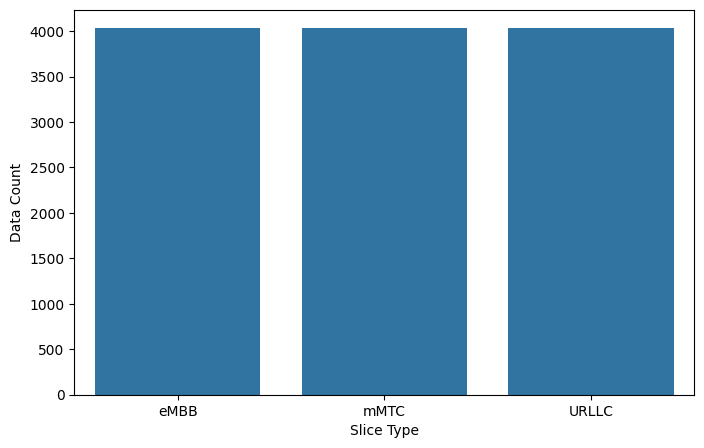

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['SliceType'], order=['eMBB','mMTC','URLLC'])
# plt.title('Balanced Class Distribution with actual labels')
plt.xlabel('Slice Type')
plt.ylabel('Data Count')
plt.show()

#### Heatmaps

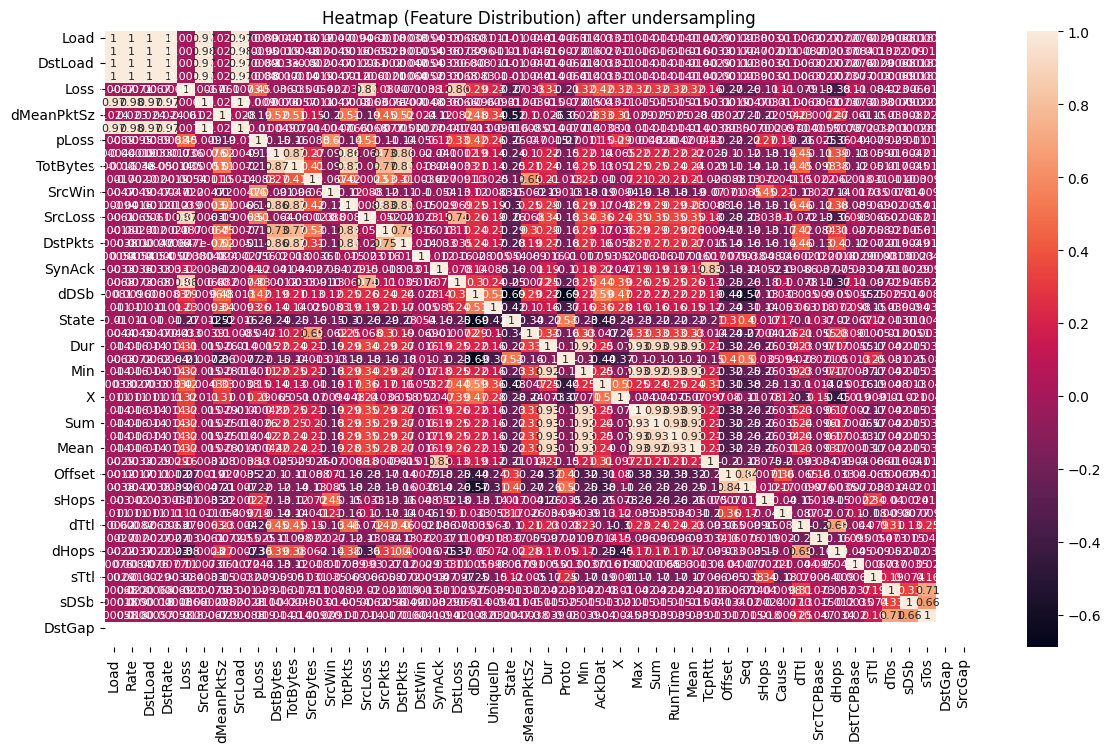

In [29]:
# Create a heatmap for the correlation matrix of all features after undersampling
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) after undersampling')
plt.show()

### **Define X and y**

In [13]:
X = data[features]
X

,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,dTtl,SrcTCPBase,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap
0,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,60.000000,...,255.000000,3904203819,1.000000,3.704605e+09,250,184.000000,6,224,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,249,0.257735,4,0,0,0
2,131.237137,0.390587,0.000000,0.000000,0.000000,0.390587,0.000000,131.237137,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0
3,84843.742190,108.662582,23297.257810,43.465034,0.000000,43.465034,66.666664,61546.484380,0.000000,200.000000,...,117.000000,97975463,11.000000,3.508802e+09,64,0.000000,4,0,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2415.138241,3.821267,901.270514,1.594339,2.000000,2.019412,68.162787,1613.406298,10.105935,478.546229,...,59.000000,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0
14452,2471.046868,3.722216,763.222253,1.400239,1.257694,2.029394,67.734197,1553.066132,9.210293,417.788733,...,59.000000,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0
14453,2283.097961,3.840632,855.459521,1.626468,2.000000,2.037339,68.009158,1774.842835,10.360201,520.916319,...,59.000000,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0
14454,2106.446226,3.244096,699.197109,1.408035,1.609694,1.797084,67.815812,1354.903131,7.659634,484.317812,...,59.000000,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0


In [14]:
y = data['SliceType']
y

,SliceType
0,URLLC
1,URLLC
2,URLLC
3,URLLC
4,URLLC
...,...
14451,mMTC
14452,mMTC
14453,mMTC
14454,mMTC


### **Apply t-sne to X**

In [15]:
X_backup = X
X_backup

,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,dTtl,SrcTCPBase,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap
0,0.000000,3460.207764,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,60.000000,...,255.000000,3904203819,1.000000,3.704605e+09,250,184.000000,6,224,0,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,249,0.257735,4,0,0,0
2,131.237137,0.390587,0.000000,0.000000,0.000000,0.390587,0.000000,131.237137,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0
3,84843.742190,108.662582,23297.257810,43.465034,0.000000,43.465034,66.666664,61546.484380,0.000000,200.000000,...,117.000000,97975463,11.000000,3.508802e+09,64,0.000000,4,0,0,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2415.138241,3.821267,901.270514,1.594339,2.000000,2.019412,68.162787,1613.406298,10.105935,478.546229,...,59.000000,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0
14452,2471.046868,3.722216,763.222253,1.400239,1.257694,2.029394,67.734197,1553.066132,9.210293,417.788733,...,59.000000,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0
14453,2283.097961,3.840632,855.459521,1.626468,2.000000,2.037339,68.009158,1774.842835,10.360201,520.916319,...,59.000000,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0
14454,2106.446226,3.244096,699.197109,1.408035,1.609694,1.797084,67.815812,1354.903131,7.659634,484.317812,...,59.000000,1202036791,5.000000,1.485176e+08,63,0.000000,4,0,0,0


In [16]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[  63.56263  ,   70.408    ],
       [  -7.768546 ,   20.825886 ],
       [  20.298418 ,   30.445248 ],
       ...,
       [-104.906105 ,    4.897453 ],
       [-104.10247  ,    5.051938 ],
       [-103.93127  ,    2.7208378]], dtype=float32)

In [17]:
X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
X

,Feature 1,Feature 2
0,63.562630,70.407997
1,-7.768546,20.825886
2,20.298418,30.445248
3,21.090105,-95.575562
4,6.914896,12.330973
...,...,...
14451,-104.932663,4.533699
14452,-104.212868,3.957897
14453,-104.906105,4.897453
14454,-104.102470,5.051938


#### Pair Plots

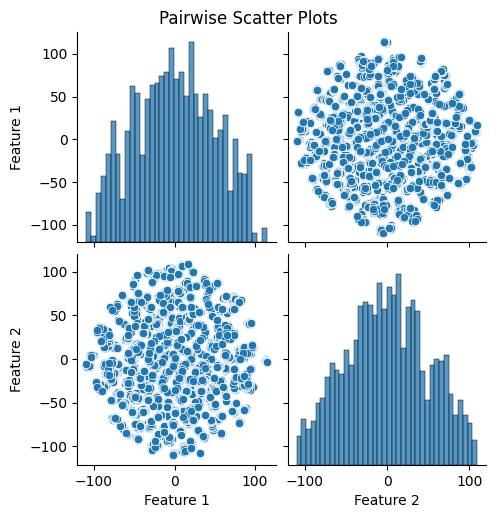

In [18]:
sns.pairplot(X)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [19]:
data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
data

,Feature 1,Feature 2,slice Type
0,63.562630,70.407997,URLLC
1,-7.768546,20.825886,URLLC
2,20.298418,30.445248,URLLC
3,21.090105,-95.575562,URLLC
4,6.914896,12.330973,URLLC
...,...,...,...
14451,-104.932663,4.533699,mMTC
14452,-104.212868,3.957897,mMTC
14453,-104.906105,4.897453,mMTC
14454,-104.102470,5.051938,mMTC


In [20]:
features = ['Feature 1', 'Feature 2']

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [ ]:
# Group data by label "slice 1"
grouped_data_slice1 = data[data['SliceType'] == 'eMBB']
grouped_data_slice1

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
4388,487350.0000,657.00000,0.713976,0.713976,0.713976,0.713976,0.713976,0.713976,3,0,...,1,70144.0,32256.0,1761459982,1.223059e+09,0.015993,0.001300,0.014693,11142.000,eMBB
4389,348351.0000,74.00000,0.233904,0.233904,0.233904,0.233904,0.233904,0.233904,3,0,...,1,78336.0,66816.0,97975463,2.274121e+09,0.069788,0.056029,0.013759,72618.000,eMBB
4390,37560.0000,3089.00000,0.248047,0.248047,0.248047,0.248047,0.248047,0.248047,3,0,...,1,77312.0,31104.0,731439299,1.545543e+09,0.017124,0.001247,0.015877,83468.000,eMBB
4391,529670.0000,6474.00000,2.971093,2.971093,2.971093,2.971093,2.971093,2.971093,3,0,...,1,743424.0,228864.0,718479468,7.858985e+08,0.044884,0.021624,0.023260,91893.000,eMBB
4392,351078.0000,1419.00000,1.422108,1.422108,1.422108,1.422108,1.422108,1.422108,3,0,...,1,552448.0,88320.0,2362066742,2.006243e+09,0.034968,0.020463,0.014505,98217.000,eMBB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10191,610513.6675,16651.88056,0.728311,0.736652,0.731157,0.729975,0.732780,0.738220,3,0,...,1,56192.0,64768.0,3408646809,3.433226e+09,0.031108,0.001851,0.018085,1887098.736,eMBB
10192,610511.7609,16648.11650,0.735486,0.737635,0.729726,0.729555,0.733684,0.735308,3,0,...,1,56192.0,64768.0,3408646809,3.433226e+09,0.030016,0.002087,0.027729,1582547.589,eMBB
10193,610508.9420,16638.06695,0.760024,0.761198,0.760514,0.764536,0.750065,0.743830,3,0,...,1,56192.0,64768.0,3408646809,3.433226e+09,0.025877,0.002005,0.028428,2256825.679,eMBB
10194,610517.8729,16647.82888,0.728350,0.729935,0.736233,0.728406,0.734040,0.737289,3,0,...,1,56192.0,64768.0,3408646809,3.433226e+09,0.024999,0.001677,0.020888,1740013.555,eMBB


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[3.33904766e+04, 2.80121460e+01, 1.86672930e+04, ...,
        1.47231836e+04, 4.54545500e+00, 1.85100000e+03],
       [2.19885078e+05, 6.84041290e+01, 1.80005469e+05, ...,
        3.98796094e+04, 5.55555600e+00, 6.14000000e+03],
       [1.69096984e+05, 6.85354000e+01, 1.37651328e+05, ...,
        3.14456543e+04, 5.26315800e+00, 4.87700000e+03],
       ...,
       [1.32264859e+05, 2.92799420e+01, 1.19055215e+05, ...,
        1.25209500e+04, 3.96290100e+00, 1.23140000e+04],
       [1.34981243e+05, 2.94388040e+01, 1.22862972e+05, ...,
        1.13999727e+04, 4.16707200e+00, 1.23140000e+04],
       [1.33280744e+05, 3.20241790e+01, 1.21904944e+05, ...,
        1.09519019e+04, 3.99651700e+00, 1.23140000e+04]])

In [ ]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([3.87530701e+05, 6.88641921e+01, 3.60044639e+05, 3.74736891e+01,
       1.05156864e+00, 2.89064455e+01, 1.12562393e+03, 2.86669296e+04,
       3.47535688e+00, 8.26786574e+04])

#### **Ground Truth Slice 2**

In [ ]:
# Group data by label "slice 2"
grouped_data_slice2 = data[data['SliceType'] == 'mMTC']
grouped_data_slice2

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
4033,727464.0000,483.000000,4.720971,4.720971,4.720971,4.720971,4.720971,4.720971,3,0,...,1,69632.0,6.860800e+04,1416618363,2.623059e+09,0.118435,0.077332,0.041103,3486.000,mMTC
4034,434935.0000,40238.000000,0.138056,0.138056,0.138056,0.138056,0.138056,0.138056,3,0,...,0,16776960.0,7.280000e-12,3293412428,3.285691e+09,0.000000,0.000000,0.000000,6256.000,mMTC
4035,728205.0000,865.000000,4.974090,4.974090,4.974090,4.974090,4.974090,4.974090,3,0,...,1,182.0,1.340000e+02,2043686795,1.618367e+09,0.000000,0.000000,0.000000,6429.000,mMTC
4036,347935.0000,12695.000000,1.157742,1.157742,1.157742,1.157742,1.157742,1.157742,3,0,...,3,64128.0,6.425600e+04,3836019920,5.297696e+08,0.207826,0.137777,0.070049,8316.000,mMTC
4037,35365.0000,1017.000000,0.172770,0.172770,0.172770,0.172770,0.172770,0.172770,3,0,...,1,78336.0,6.681600e+04,2977476616,3.273577e+09,0.041981,0.021117,0.020864,10829.000,mMTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,455292.3772,281.829734,3.620188,3.961441,3.642492,4.080528,3.689328,3.684907,3,0,...,1,64256.0,6.489600e+04,1202036791,1.485176e+08,0.595314,0.723920,0.032170,2373584.832,mMTC
14452,455262.0258,298.318232,4.376486,2.966175,3.594366,3.873222,3.280655,3.083385,3,0,...,1,64256.0,6.489600e+04,1202036791,1.485176e+08,0.652207,0.874332,0.028468,2367298.319,mMTC
14453,455286.2470,293.324452,3.818366,3.667252,4.340313,4.514485,3.882577,4.103266,3,0,...,1,64256.0,6.489600e+04,1202036791,1.485176e+08,0.876566,0.250007,0.041358,2383580.426,mMTC
14454,455211.1026,171.202752,4.414447,4.101491,4.156414,4.301263,4.173065,4.550792,3,0,...,1,64256.0,6.489600e+04,1202036791,1.485176e+08,0.547553,0.645027,0.027258,2384145.715,mMTC


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[6.29362061e+03, 7.41372900e+00, 2.47406714e+03, ...,
        3.81955322e+03, 2.50000000e+01, 1.59200000e+03],
       [4.28811523e+03, 7.24343800e+00, 0.00000000e+00, ...,
        4.28811523e+03, 5.00000000e+01, 0.00000000e+00],
       [7.72322168e+03, 8.64479700e+00, 3.05261865e+03, ...,
        4.67060303e+03, 2.54237290e+01, 2.04400000e+03],
       ...,
       [2.28309796e+03, 3.84063200e+00, 8.55459521e+02, ...,
        1.77484283e+03, 1.03602010e+01, 5.20916319e+02],
       [2.10644623e+03, 3.24409600e+00, 6.99197109e+02, ...,
        1.35490313e+03, 7.65963400e+00, 4.84317812e+02],
       [2.27060664e+03, 3.70029800e+00, 7.39669091e+02, ...,
        1.73242525e+03, 9.90437200e+00, 4.49616122e+02]])

In [ ]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([3.81072502e+04, 1.26563194e+01, 2.81441124e+04, 5.64271322e+00,
       3.24350703e+00, 6.74572274e+00, 1.90012081e+02, 9.53763176e+03,
       1.63304264e+01, 4.78526994e+03])

#### **Ground Truth Slice 3**

In [ ]:
# Group data by label "slice 3"
grouped_data_slice3 = data[data['SliceType'] == 'URLLC']
grouped_data_slice3

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,SliceType
0,34555.0,982.0,0.000289,0.000289,0.000289,0.000289,0.000289,0.000289,4,224,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,144379.0,URLLC
1,531568.0,11362.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,181691.0,URLLC
2,360399.0,70834.0,2.560251,2.560251,2.560251,2.560251,2.560251,2.560251,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,175580.0,URLLC
3,30702.0,440.0,0.046014,0.046014,0.046014,0.046014,0.046014,0.046014,4,0,...,1,56960.000,77568.00000,97975463,3.508802e+09,0.000000,0.000000,0.000000,120239.0,URLLC
4,312747.0,128397.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,348612.0,URLLC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,261675.0,60258.0,2.581770,2.581770,2.581770,2.581770,2.581770,2.581770,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,75584.0,URLLC
4029,214379.0,30265.0,2.577992,2.577992,2.577992,2.577992,2.577992,2.577992,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,146997.0,URLLC
4030,108012.0,5253.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,...,5,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,179751.0,URLLC
4031,12551.0,1082.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3,0,...,5,0.000,64896.00000,1953099353,3.643101e+09,0.000000,0.000000,0.000000,30564.0,URLLC


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[0.00000000e+00, 3.46020776e+03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.31237137e+02, 3.90587000e-01, 0.00000000e+00, ...,
        1.31237137e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 6.60000000e+01]])

In [ ]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([2.55782830e+06, 4.08314824e+02, 2.49282592e+06, 2.38163799e+02,
       1.19018101e-02, 1.13886621e+02, 5.55641491e+01, 6.50023975e+04,
       2.99676120e-01, 8.02615671e+02])

#### **Plot Ground Truth**

In [ ]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[3.87530701e+05, 6.88641921e+01, 3.60044639e+05, 3.74736891e+01,
        1.05156864e+00, 2.89064455e+01, 1.12562393e+03, 2.86669296e+04,
        3.47535688e+00, 8.26786574e+04],
       [3.81072502e+04, 1.26563194e+01, 2.81441124e+04, 5.64271322e+00,
        3.24350703e+00, 6.74572274e+00, 1.90012081e+02, 9.53763176e+03,
        1.63304264e+01, 4.78526994e+03],
       [2.55782830e+06, 4.08314824e+02, 2.49282592e+06, 2.38163799e+02,
        1.19018101e-02, 1.13886621e+02, 5.55641491e+01, 6.50023975e+04,
        2.99676120e-01, 8.02615671e+02]])

In [ ]:
# # Testing the for loop
# for cluster in range(1, len(np.unique(data['slice Type']))+1):
#     cluster_data = data[data['slice Type'] == cluster]
#     print(cluster, "\n",cluster_data, "\n")

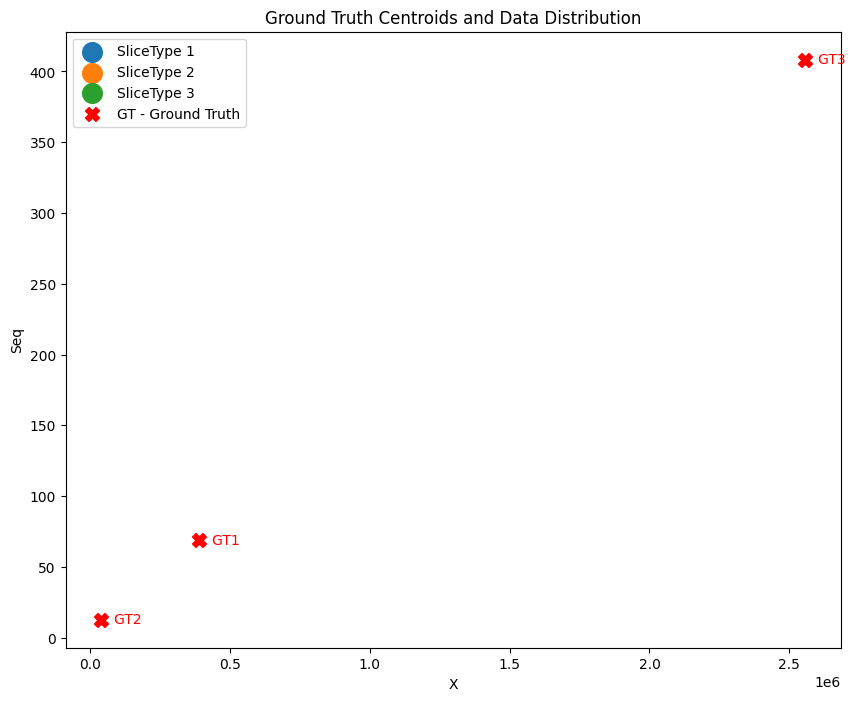

In [ ]:
# Plot the scatter plot with different colors for each class
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(data['SliceType']))+1):
    cluster_data = data[data['SliceType'] == cluster]
    plt.scatter(cluster_data[data.columns[0]], cluster_data[data.columns[1]], s=200, label=f'SliceType {cluster}')

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth Centroids and Data Distribution')
plt.legend()
# plt.xlim(-200, 200)  # Set your desired x-axis range
# plt.ylim(-200, 200)  # Set your desired y-axis range
plt.show()

### **Datasplit - X, X_train and X_test**

In [12]:
print(b)

42


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=b)
X_train

,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,dTtl,SrcTCPBase,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap
247,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0
10005,367913.309600,76.109599,379530.112500,35.756334,1.000000,34.676228,1217.400024,18112.559330,4.778971,12174.000000,...,59.000000,2542815621,5.000000,3.847444e+09,63,0.000000,4,0,0,0
11390,11206.546320,9.699842,3562.558961,3.849965,10.414807,8.565079,130.719774,7299.206188,24.656984,1152.557318,...,64.000000,543343676,0.000000,3.940740e+09,64,0.000000,4,0,0,0
12018,37024.643430,12.450785,12404.117280,6.916404,1.000000,5.400381,252.551221,23309.431660,1.799957,8640.471713,...,116.000000,1091501713,11.000000,3.439865e+09,64,0.000000,4,0,0,0
10117,131602.669700,30.843046,119449.836400,14.557017,1.000000,13.120906,1026.166626,11237.712210,4.199761,12314.000000,...,59.000000,3408646809,5.000000,3.433226e+09,63,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,342301.958500,44.364562,326201.503400,29.836329,1.000000,5.482154,1356.633172,19773.562910,0.556081,156351.183400,...,117.000000,850767236,11.000000,5.466176e+08,64,0.000000,4,0,0,0
13418,4342.127966,4.223407,3252.759624,2.151351,1.000000,1.455812,242.991987,871.677054,9.310396,1286.993666,...,59.000000,1886462680,5.000000,3.086442e+09,63,0.000000,4,0,0,0
5390,376826.536600,76.774407,446399.017900,53.991845,1.000000,27.727192,1065.783469,15382.893110,5.443820,11947.517310,...,59.000000,2337392238,5.000000,4.232232e+09,63,0.000000,4,0,0,0
860,130.563934,0.388583,0.000000,0.000000,0.000000,0.388583,0.000000,130.563934,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0


In [14]:
X_test

,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,dTtl,SrcTCPBase,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap
3146,1.477076e+02,0.439606,0.000000e+00,0.000000,0.000000,0.439606,0.000000,147.707626,0.000000,0.000000,...,72.421437,1836252122,5.931325,2.446250e+09,63,0.257735,4,0,0,0
14090,2.263857e+03,3.632123,7.849698e+02,1.463701,1.000000,1.928375,67.055171,1466.519430,5.716374,500.613081,...,59.000000,3691999627,5.000000,4.150003e+09,63,0.000000,4,0,0,0
13473,2.541616e+03,3.721983,7.653655e+02,1.422970,1.000000,1.994199,67.135955,1484.382602,5.400960,488.598364,...,59.000000,3661029902,5.000000,3.128347e+08,63,0.000000,4,0,0,0
14074,2.171078e+03,3.556572,7.381477e+02,1.359428,1.000000,1.739120,67.467081,1413.843126,6.086617,454.095091,...,59.000000,3645728635,5.000000,2.059269e+09,63,0.000000,4,0,0,0
13012,4.715410e+03,4.217047,3.911684e+03,2.809133,1.000000,2.193221,237.325137,1325.767343,8.913024,1269.535654,...,59.000000,421855026,5.000000,1.770455e+09,63,0.000000,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,3.120230e+06,433.703094,2.934929e+06,263.542084,1.000000,169.123459,1392.058838,185301.203100,0.238095,354975.000000,...,117.000000,3042380553,11.000000,9.372369e+07,64,0.000000,4,0,0,0
11304,1.105081e+04,12.715422,4.956829e+03,4.237611,20.572235,8.261310,133.186053,6655.748903,25.049085,2686.999197,...,64.000000,543343676,0.000000,3.940740e+09,64,0.000000,4,0,0,0
1199,0.000000e+00,9090.909180,0.000000e+00,0.000000,0.000000,0.000000,114.000000,0.000000,0.000000,114.000000,...,255.000000,3904203819,1.000000,3.704605e+09,250,186.000000,2,40,0,0
9024,3.812774e+05,80.389627,3.480347e+05,36.276322,1.000000,28.639757,1217.400024,19841.873730,4.803786,12174.000000,...,59.000000,2542815621,5.000000,3.847444e+09,63,0.000000,4,0,0,0


In [15]:
y_train

,SliceType
247,URLLC
10005,eMBB
11390,mMTC
12018,mMTC
10117,eMBB
...,...
5191,eMBB
13418,mMTC
5390,eMBB
860,URLLC


In [16]:
y_test

,SliceType
3146,URLLC
14090,mMTC
13473,mMTC
14074,mMTC
13012,mMTC
...,...
4400,eMBB
11304,mMTC
1199,URLLC
9024,eMBB


# **Data Modelling and Analysis**

## **Model Training**

In [17]:
print(c)

42


In [18]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=c)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

KMeans(n_clusters=3, random_state=42)

## **Hyperparameter Tuning**

In [ ]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [50, 100, 200, 300],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [35]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([1, 2, 1, ..., 1, 2, 1], dtype=int32)

In [36]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([2, 3, 2, ..., 2, 3, 2], dtype=int32)

In [37]:
len(kmeans_model_labels_aligned)

13010

In [38]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

## **Model Centroids**

In [33]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[-53.795475,  -9.59741 ],
       [ 35.698597, -39.704086],
       [ 15.768222,  52.593925]], dtype=float32)

In [34]:
C1 = kmeans_model_centroids[0]
C1

array([-53.795475,  -9.59741 ], dtype=float32)

In [35]:
C2 = kmeans_model_centroids[1]
C2

array([ 35.698597, -39.704086], dtype=float32)

In [36]:
C3 = kmeans_model_centroids[2]
C3

array([15.768222, 52.593925], dtype=float32)

In [34]:
feature_lists = [features, features, features]
feature_lists

[['Rate',
  'Loss',
  'Load',
  'pLoss',
  'DstRate',
  'SrcRate',
  'DstLoad',
  'dMeanPktSz',
  'SrcLoad',
  'SrcWin',
  'SrcBytes',
  'DstBytes',
  'TotBytes',
  'TotPkts',
  'DstPkts',
  'SrcPkts',
  'DstWin',
  'DstLoss',
  'SrcLoss',
  'State',
  'SynAck',
  'Dur',
  'Seq',
  'UniqueID',
  'AckDat',
  'Proto',
  'Min',
  'dDSb',
  'Mean',
  'Offset',
  'TcpRtt',
  'Sum',
  'RunTime',
  'Max',
  'X',
  'dTtl',
  'sMeanPktSz',
  'sHops',
  'dHops',
  'Cause',
  'SrcTCPBase',
  'DstTCPBase',
  'sTtl',
  'sTos',
  'dTos',
  'sDSb',
  'DstGap',
  'SrcGap'],
 ['Rate',
  'Loss',
  'Load',
  'pLoss',
  'DstRate',
  'SrcRate',
  'DstLoad',
  'dMeanPktSz',
  'SrcLoad',
  'SrcWin',
  'SrcBytes',
  'DstBytes',
  'TotBytes',
  'TotPkts',
  'DstPkts',
  'SrcPkts',
  'DstWin',
  'DstLoss',
  'SrcLoss',
  'State',
  'SynAck',
  'Dur',
  'Seq',
  'UniqueID',
  'AckDat',
  'Proto',
  'Min',
  'dDSb',
  'Mean',
  'Offset',
  'TcpRtt',
  'Sum',
  'RunTime',
  'Max',
  'X',
  'dTtl',
  'sMeanPktSz',


In [35]:
# Determine the number of columns (max length of feature lists)
num_columns = max(len(feature_list) for feature_list in feature_lists)
num_columns

48

In [36]:
# arr = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]).astype(np.float32)
# arr
# arr.dtype

# Create an empty NumPy array with 3 rows and num_columns columns, filled with 0.0
arr = np.zeros((3, num_columns)).astype(np.float64)
print(arr)
print(arr.dtype)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
float64


#### **Plot Model Centroids**

In [37]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

In [38]:
# Get the column names from the original DataFrame
X_train_column_names = X_train.columns.tolist()

# Convert X_test to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace X_test_column_names with your actual column names
X_train_with_cluster_labels = X_train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Include the 'labels' as a new column in the DataFrame
X_train_with_cluster_labels['cluster_label'] = kmeans_model_labels_aligned
X_train_with_cluster_labels

,Feature 1,Feature 2,cluster_label
247,30.532656,7.330755,2
10005,65.831673,27.176363,3
11390,28.810852,-81.432816,2
12018,47.519604,-78.518494,2
10117,42.382923,78.407158,3
...,...,...,...
5191,-85.325409,-12.616719,1
13418,49.183041,-21.437859,2
5390,80.832100,1.398651,2
860,22.437227,34.175632,3


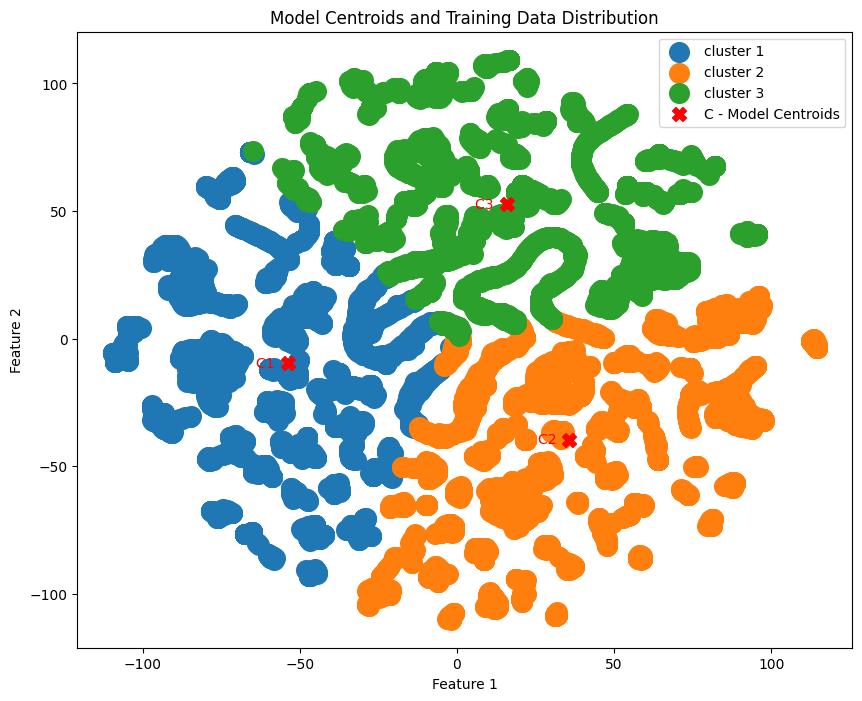

In [42]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster {cluster}')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='red', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='red', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Model Centroids and Training Data Distribution')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

## **Minimum Distance of C1 from Ground Truths**

In [ ]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

293571.97198956757

In [ ]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

194993.97549819088

In [ ]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

3332730.723994464

In [ ]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "eMBB"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "mMTC"
    arr[0] = C2
else:
    closest_centroid_C1 = "URLLC"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  194993.97549819088 from the Model's Centroid/Cluster mMTC


array([[3.94181811e+09, 6.36363625e+05, 3.82181811e+09, 3.63636375e+05,
        0.00000000e+00, 2.27272719e+05, 1.31366663e+03, 1.20000000e+08,
        0.00000000e+00, 1.18230000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

## **Minimum Distance of C2 from Ground Truths**

In [ ]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

5491157482.925487

In [ ]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

5491639688.146147

In [ ]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

5488114632.1369

In [ ]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "eMBB"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "mMTC"
    arr[1] = C2
else:
    closest_centroid_C2 = "URLLC"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  5488114632.1369 from the Model's Centroid/Cluster URLLC


array([[3.94181811e+09, 6.36363625e+05, 3.82181811e+09, 3.63636375e+05,
        0.00000000e+00, 2.27272719e+05, 1.31366663e+03, 1.20000000e+08,
        0.00000000e+00, 1.18230000e+04],
       [6.11885722e+09, 8.57142875e+05, 6.00571443e+09, 5.71428562e+05,
        0.00000000e+00, 2.14285719e+05, 1.31366663e+03, 1.13142856e+08,
        0.00000000e+00, 1.18230000e+04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

## **Minimum Distance of C3 from Ground Truths**

In [ ]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

8573957577.424401

In [ ]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

8574439651.021586

In [ ]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

8570914511.233345

In [ ]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "eMBB"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "mMTC"
    arr[2] = C2
else:
    closest_centroid_C3 = "URLLC"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  8570914511.233345 from the Model's Centroid/Cluster URLLC


array([[3.94181811e+09, 6.36363625e+05, 3.82181811e+09, 3.63636375e+05,
        0.00000000e+00, 2.27272719e+05, 1.31366663e+03, 1.20000000e+08,
        0.00000000e+00, 1.18230000e+04],
       [6.11885722e+09, 8.57142875e+05, 6.00571443e+09, 5.71428562e+05,
        0.00000000e+00, 2.14285719e+05, 1.31366663e+03, 1.13142856e+08,
        0.00000000e+00, 1.18230000e+04],
       [6.11885722e+09, 8.57142875e+05, 6.00571443e+09, 5.71428562e+05,
        0.00000000e+00, 2.14285719e+05, 1.31366663e+03, 1.13142856e+08,
        0.00000000e+00, 1.18230000e+04]])

## **Model Centroids Mapping to Labels**

In [ ]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  194993.97549819088 from the Model's Centroid/Cluster mMTC
C2 has minimum distance of  5488114632.1369 from the Model's Centroid/Cluster URLLC
C3 has minimum distance of  8570914511.233345 from the Model's Centroid/Cluster URLLC


### **Before Mapping the Labels**

In [ ]:
kmeans_model

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans_model_centroids

array([[1.77249137e+05, 4.04319534e+01, 1.61212088e+05, 1.78675844e+01,
        1.45513266e+00, 1.47070116e+01, 5.27564994e+02, 1.65109865e+04,
        6.66858347e+00, 3.48910316e+04],
       [3.94181811e+09, 6.36363625e+05, 3.82181811e+09, 3.63636375e+05,
        0.00000000e+00, 2.27272719e+05, 1.31366663e+03, 1.20000000e+08,
        0.00000000e+00, 1.18230000e+04],
       [6.11885722e+09, 8.57142875e+05, 6.00571443e+09, 5.71428562e+05,
        0.00000000e+00, 2.14285719e+05, 1.31366663e+03, 1.13142856e+08,
        0.00000000e+00, 1.18230000e+04]])

In [ ]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster_label {cluster}')

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth & Model Centroids (before mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

KeyError: 'X'

<Figure size 1000x800 with 0 Axes>

### **After Mapping the Labels**

In [ ]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=42)

In [ ]:
kmeans_model_mod.cluster_centers_ = arr

In [ ]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[3.94181811e+09, 6.36363625e+05, 3.82181811e+09, 3.63636375e+05,
        0.00000000e+00, 2.27272719e+05, 1.31366663e+03, 1.20000000e+08,
        0.00000000e+00, 1.18230000e+04],
       [6.11885722e+09, 8.57142875e+05, 6.00571443e+09, 5.71428562e+05,
        0.00000000e+00, 2.14285719e+05, 1.31366663e+03, 1.13142856e+08,
        0.00000000e+00, 1.18230000e+04],
       [6.11885722e+09, 8.57142875e+05, 6.00571443e+09, 5.71428562e+05,
        0.00000000e+00, 2.14285719e+05, 1.31366663e+03, 1.13142856e+08,
        0.00000000e+00, 1.18230000e+04]])

In [ ]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster_label {cluster}')

# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_train_with_cluster_labels['cluster_label'], data=X_train_with_cluster_labels, palette='Set1', s=200)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth & Model Centroids (after mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

KeyError: 'X'

<Figure size 1000x800 with 0 Axes>

# **Model Testing**

In [19]:
# Predict the labels for the test data
y_pred = kmeans_model.predict(X_test)
# y_pred = kmeans_model_mod.predict(X_test)
y_pred

array([2, 1, 0, ..., 1, 1, 2], dtype=int32)

In [20]:
np.unique(y_pred)

array([0, 1, 2], dtype=int32)

In [21]:
y_pred_aligned = y_pred + 1
y_pred_aligned

array([3, 2, 1, ..., 2, 2, 3], dtype=int32)

In [22]:
len(y_pred_aligned)

1446

In [23]:
np.unique(y_pred_aligned)

array([1, 2, 3], dtype=int32)

## **Update testing dataset with labels**

In [24]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

# Display the Updated Table
X_test_with_labels[:20]

,Load,Rate,DstLoad,DstRate,Loss,SrcRate,dMeanPktSz,SrcLoad,pLoss,DstBytes,...,dHops,DstTCPBase,sTtl,dTos,sDSb,sTos,DstGap,SrcGap,actual_label,predicted_label
0,147.707626,0.439606,0.000000,0.000000,0.000000,0.439606,0.000000,147.707626,0.000000,0.000000,...,5.931325,2.446250e+09,63,0.257735,4,0,0,0,URLLC,3
1,2263.856845,3.632123,784.969841,1.463701,1.000000,1.928375,67.055171,1466.519430,5.716374,500.613081,...,5.000000,4.150003e+09,63,0.000000,4,0,0,0,mMTC,2
2,2541.616443,3.721983,765.365530,1.422970,1.000000,1.994199,67.135955,1484.382602,5.400960,488.598364,...,5.000000,3.128347e+08,63,0.000000,4,0,0,0,mMTC,1
3,2171.078333,3.556572,738.147718,1.359428,1.000000,1.739120,67.467081,1413.843126,6.086617,454.095091,...,5.000000,2.059269e+09,63,0.000000,4,0,0,0,mMTC,2
4,4715.410264,4.217047,3911.683537,2.809133,1.000000,2.193221,237.325137,1325.767343,8.913024,1269.535654,...,5.000000,1.770455e+09,63,0.000000,4,0,0,0,mMTC,3
5,2270.606637,3.700298,739.669091,1.385381,1.346742,1.952817,67.907169,1732.425248,9.904372,449.616122,...,5.000000,1.485176e+08,63,0.000000,4,0,0,0,mMTC,1
6,135592.629700,31.502518,122468.850500,15.058898,1.000000,15.861592,1026.166626,12407.797510,3.970502,12314.000000,...,5.000000,2.938787e+09,63,0.000000,4,0,0,0,eMBB,3
7,432583.420900,59.802144,340445.791900,45.469054,1.000000,28.149580,1049.632388,28981.050880,2.241276,74253.388930,...,11.000000,5.466176e+08,64,0.000000,4,0,0,0,eMBB,1
8,509440.149900,81.762924,505046.985100,55.362723,1.753736,41.659434,1117.823565,38853.950360,0.267660,249656.197900,...,11.000000,3.278420e+08,64,0.000000,4,0,0,0,eMBB,1
9,291280.132800,82.910694,380728.136400,33.617023,1.000000,25.264645,1193.075936,14624.441160,5.547022,11843.969040,...,5.000000,4.232232e+09,63,0.000000,4,0,0,0,eMBB,2


## **Predicted Label Analysis**

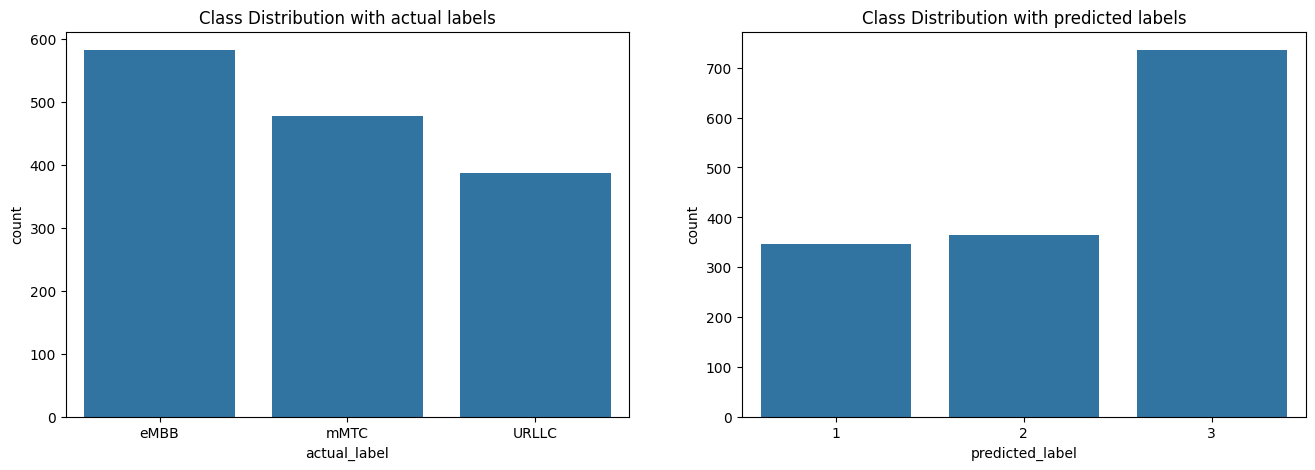

In [25]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0], order=['eMBB','mMTC','URLLC'])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

In [26]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.4472570260358018


In [27]:
cluster_labels = kmeans_model.labels_
print("Silhouette Score:", silhouette_score(X_train, cluster_labels))

Silhouette Score: 0.4483704671010903


In [28]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 0.9321025911603072


In [29]:
print("Davies-Bouldin Index for Training Data:", metrics.davies_bouldin_score(X_train, cluster_labels))

Davies-Bouldin Index for Training Data: 0.9486977874347478


In [30]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 0.07605428604269515


In [ ]:
# # Plot the scatter plot with different colors for the testing data
# plt.figure(figsize=(16, 8))

# # Plot the Ground Truth Centroids
# plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
# for i, centroid in enumerate(GT_centroids):
#     plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# # Plot the Model Centroids
# plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
# for i, centroid in enumerate(kmeans_model_centroids_mapped):
#     plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# # Plot Actual Labels in Testing Dataset
# for cluster in range(1, len(np.unique(y_pred_aligned))+1):
#     # cluster_data_test = X_test_with_labels[X_test_with_labels['actual_label'] == cluster]
#     cluster_data_test = X_test_with_labels[actual_label == cluster]
#     plt.scatter(cluster_data_test[data.columns[0]], cluster_data_test[data.columns[1]], s=200, label=f'actual_label {cluster}')
# # sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['actual_label'], data=X_test_with_labels, palette='Set1', s=200)

# # Plot Predicted Labels in Testing Dataset
# for cluster in range(1, len(np.unique(y_pred_aligned))+1):
#     # cluster_data_test = X_test_with_labels[X_test_with_labels['predicted_label'] == cluster]
#     cluster_data_test = X_test_with_labels[predicted_label == cluster]
#     plt.scatter(cluster_data_test[data.columns[0]], cluster_data_test[data.columns[1]], marker='x', s=200, label=f'predicted_label {cluster}')
# # sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['predicted_label'], data=X_test_with_labels, palette='Set1', s=200, marker='x')

# # Adding a footer or note
# plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
# plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
# plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

# plt.xlabel(data.columns[0])
# plt.ylabel(data.columns[1])
# plt.title('Actual vs. Predicted Labels in Testing Dataset')
# plt.legend()
# # plt.xlim(-150, 150)  # Set your desired x-axis range
# # plt.ylim(-150, 150)  # Set your desired y-axis range
# plt.show()

In [ ]:
# # Plot the scatter plot with different colors for the testing data
# plt.figure(figsize=(16, 8))

# # Plot Actual Labels in Testing Dataset
# scatter1 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = actual_label, cmap='copper', edgecolors='k', alpha=1.0, s=300, marker='o')
# # Plot Predicted Labels in Testing Dataset
# scatter2 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = predicted_label, cmap='winter', edgecolors='k', alpha=0.7, s=300, marker='x')

# # Add colorbar for better interpretation of Cluster Labels
# cbar1 = plt.colorbar(scatter1)
# cbar1.set_label('Actual Cluster Label')
# cbar2 = plt.colorbar(scatter2)
# cbar2.set_label('Predicted Cluster Label')

# # Plot the Ground Truth Centroids
# plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
# for i, centroid in enumerate(GT_centroids):
#     plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# # Plot the Model Centroids
# plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
# for i, centroid in enumerate(kmeans_model_centroids_mapped):
#     plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# # Plot ovals around centroids to denote clusters
# for i in range((len(np.unique(kmeans_model_labels_aligned)))):
#     cluster_points = X_train[kmeans_model_labels_aligned == (i+1)]
#     # Calculate the radii along the x and y axes
#     x_radius = np.max(np.abs(cluster_points[X_train.columns[0]] - kmeans_model_centroids_mapped[i, 0]))
#     y_radius = np.max(np.abs(cluster_points[X_train.columns[1]] - kmeans_model_centroids_mapped[i, 1]))
#     ellipse = Ellipse((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 3.2 * x_radius, 0.6 * y_radius, color='red', alpha=0.1)
#     plt.gca().add_patch(ellipse)
#     # circle = Circle((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 1 * x_radius, color='red', alpha=0.1)
#     # plt.gca().add_patch(circle)

# # Adding a footer or note
# plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
# plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
# plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

# plt.xlabel(data.columns[0])
# plt.ylabel(data.columns[1])
# plt.title('Actual vs. Predicted Labels in Testing Dataset')
# plt.legend()
# # plt.xlim(-150, 150)  # Set your desired x-axis range
# # plt.ylim(-150, 150)  # Set your desired y-axis range
# plt.show()

### **Confusion Matrix using built-in libraries**

In [77]:
# # Confusion Matrix
# plt.figure(figsize=(10, 4))
# cm = confusion_matrix(actual_label, predicted_label)
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted Slice Type')
# plt.ylabel('Actual Slice Type')
# plt.show()
# print("\n", a, b, c)

In [31]:
predicted_label

,predicted_label
0,3
1,2
2,1
3,2
4,3
...,...
1441,1
1442,3
1443,2
1444,2


In [32]:
actual_label

,actual_label
0,URLLC
1,mMTC
2,mMTC
3,mMTC
4,mMTC
...,...
1441,eMBB
1442,mMTC
1443,URLLC
1444,eMBB


In [33]:
# Replace values in the "Slice Type" column
actual_label = actual_label.replace({'eMBB': 1, 'mMTC': 2, 'URLLC': 3})
actual_label

<ipython-input-33-bb62b6468508>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  actual_label = actual_label.replace({'eMBB': 1, 'mMTC': 2, 'URLLC': 3})


,actual_label
0,3
1,2
2,2
3,2
4,2
...,...
1441,1
1442,2
1443,3
1444,1


In [34]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 0.4467496542185339
Precision 0.46714459506264755
Recall 0.4467496542185339
F1-score 0.42652762179572323


In [63]:
# Print confusion matrix
cm = confusion_matrix(actual_label, predicted_label)
cm

array([[234, 219, 129],
       [132, 187, 158],
       [123,  85, 179]])

In [ ]:
# # True Positives (TP) for each class
# TP_class0 = conf_matrix[0, 0]
# TP_class1 = conf_matrix[1, 1]
# TP_class2 = conf_matrix[2, 2]

# # False Positives (FP) for each class
# FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
# FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
# FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# # False Negatives (FN) for each class
# FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
# FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
# FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# # True Negatives (TN) for each class
# TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
# TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
# TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# # Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
# TP = TP_class0 + TP_class1 + TP_class2
# FP = FP_class0 + FP_class1 + FP_class2
# FN = FN_class0 + FN_class1 + FN_class2
# TN = TN_class0 + TN_class1 + TN_class2

# # Display the values
# print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
# print("False Negatives (FN):", FN)
# print("True Negatives (TN):", TN)

In [ ]:
# acc = (TP + TN)/(TP + TN + FP + FN)
# pres = TP/(TP + FP)
# rec = TP/(TP + FN)
# f1 = 2 * ((pres * rec)/(pres + rec))
# print("Accuracy", acc)
# print("Precision", pres)
# print("Recall", rec)
# print("F1-score", f1)

### **Confusion Matrix using Mathematical Equation**

In [ ]:
# actual_label

0       3
1       3
2       2
3       2
4       1
       ..
2213    2
2214    2
2215    1
2216    2
2217    3
Name: actual_label, Length: 2218, dtype: int64

In [ ]:
# predicted_label

0       3
1       3
2       2
3       2
4       1
       ..
2213    2
2214    2
2215    1
2216    2
2217    3
Name: predicted_label, Length: 2218, dtype: int32

In [60]:
# # Initialize counts for TP, FP, FN, and TN for each class
# TP_class = [0, 0, 0]
# FP_class = [0, 0, 0]
# FN_class = [0, 0, 0]
# TN_class = [0, 0, 0]

# # Iterate over each sample
# for actual, predicted in zip(actual_label, predicted_label):
#     # Iterate over each class
#     for c in range(len(np.unique(actual_label))):
#         # Increment counts based on the classification result
#         if actual == c+1 and predicted == c+1:  # True Positives
#             TP_class[c] += 1
#         elif actual == c+1 and predicted != c+1:  # False Negatives
#             FN_class[c] += 1
#         elif actual != c+1 and predicted == c+1:  # False Positives
#             FP_class[c] += 1
#         elif actual != c+1 and predicted != c+1:  # True Negatives
#             TN_class[c] += 1

# # Print the results for each class
# print("True Positives (TP):", TP_class)
# print("False Positives (FP):", FP_class)
# print("False Negatives (FN):", FN_class)
# print("True Negatives (TN):", TN_class)
# print("\n")

# # Print the results for each class and overall
# for c in range(len(np.unique(actual_label))):
#     print(f"Class {c+1}:")
#     print("True Positives (TP):", TP_class[c])
#     print("False Positives (FP):", FP_class[c])
#     print("False Negatives (FN):", FN_class[c])
#     print("True Negatives (TN):", TN_class[c])
#     print("\n")

# # Compute overall TP, FP, FN, TN
# TP = sum(TP_class)
# FP = sum(FP_class)
# FN = sum(FN_class)
# TN = sum(TN_class)

# # Print the overall results
# print("Overall:")
# print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
# print("False Negatives (FN):", FN)
# print("True Negatives (TN):", TN)

In [61]:
# # Create the confusion matrix array for each class
# for c in range(len(np.unique(actual_label))):
#     print("\n", f"Class {c+1}:")
#     conf_matrix = np.array([
#         [TP_class[c], FP_class[c]],
#          [FN_class[c], TN_class[c]]
#         ])
#     print(conf_matrix, "\n")

#     # Set labels for the current class
#     if c == 0:
#         current_class_label = '1'
#     elif c == 1:
#         current_class_label = '2'
#     elif c == 2:
#         current_class_label = '3'
#     else:
#         current_class_label = 'Others'

#     # Confusion Matrix
#     plt.figure(figsize=(8, 5))
#     sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[current_class_label, 'Others'], yticklabels=[current_class_label, 'Others'])
#     plt.title(f'Confusion Matrix Slice Type {c+1}')
#     plt.xlabel('Predicted Slice Type')
#     plt.ylabel('Actual Slice Type')
#     plt.show()
#     print()
#     accuracy = (TP_class[c] + TN_class[c])/(TP_class[c] + TN_class[c] + FP_class[c] + FN_class[c])
#     precision = TP_class[c]/(TP_class[c] + FP_class[c])
#     recall = TP_class[c]/(TP_class[c] + FN_class[c])
#     f1score = 2 * ((precision * recall)/(precision + recall))
#     print("Accuracy", accuracy)
#     print("Precision", precision)
#     print("Recall", recall)
#     print("F1-score", f1score)
#     print()

In [62]:
# # Overall
# overall_accuracy = (TP + TN)/(TP + TN + FP + FN)
# overall_precision = TP/(TP + FP)
# overall_recall = TP/(TP + FN)
# overall_f1score = 2 * ((precision * recall)/(precision + recall))
# print("Accuracy", overall_accuracy)
# print("Precision", overall_precision)
# print("Recall", overall_recall)
# print("F1-score", overall_f1score)

# **Data Perturbation**

In [15]:
X = data.drop('SliceType', axis=1)
y = data['SliceType']

# Replace string labels with numerical
y = y.replace({'eMBB': 1, 'mMTC': 2, 'URLLC': 3})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Define the number of clusters
n_clusters = 3

# Apply k-means clustering on the extracted features
kmeans_model = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_model.fit(X_train)
X_test

<ipython-input-15-347f009ccceb>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'eMBB': 1, 'mMTC': 2, 'URLLC': 3})


,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,DstRate,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID
3146,63845.0000,10897.000000,2.274764,2.274764,2.274764,2.274764,2.274764,2.274764,4,0,...,0.000000,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,3.538260e+05
14090,455211.9161,229.258591,4.141109,4.159860,4.508846,4.349285,4.139995,4.476563,3,0,...,1.463701,1,64256.000,64896.00000,3691999627,4.150003e+09,0.036482,0.001511,0.016450,2.199769e+06
13473,455163.9077,178.422297,3.743877,3.366425,4.464098,4.607841,4.379291,3.465044,3,0,...,1.422970,1,64256.000,64896.00000,3661029902,3.128347e+08,0.052980,0.001300,0.051753,1.262996e+06
14074,455186.0066,170.868686,3.935611,3.809795,3.988125,3.993783,3.563485,3.871054,3,0,...,1.359428,1,64256.000,64896.00000,3645728635,2.059269e+09,0.023083,0.001261,0.016972,2.193874e+06
13012,670666.5187,2339.502841,2.019092,2.020389,1.918310,1.979231,1.961954,1.949320,3,0,...,2.809133,6,64128.000,65024.00000,421855026,1.770455e+09,0.013935,0.001552,0.012667,1.626685e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4400,648282.0000,29592.000000,0.963793,0.963793,0.963793,0.963793,0.963793,0.963793,3,0,...,263.542084,1,791552.000,98560.00000,3042380553,9.372369e+07,0.035104,0.020699,0.014405,1.139068e+06
11304,727010.8294,76.935274,4.945987,4.610645,4.808042,4.886788,4.952790,4.870215,3,0,...,4.237611,1,91648.000,68608.00000,543343676,3.940740e+09,0.125212,0.080419,0.050343,1.196747e+06
1199,518020.0000,40.000000,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,2,40,...,0.000000,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,2.526140e+05
9024,636904.0641,25258.870950,0.243324,0.251760,0.247878,0.241567,0.240150,0.249803,3,0,...,36.276322,1,56704.000,64896.00000,2542815621,3.847444e+09,0.017971,0.001676,0.015842,2.215805e+06


In [31]:
# # Make predictions
# y_pred = kmeans_model.predict(X_test)

# # Print confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(4,2))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
# plt.title('Actual Data')
# plt.ylabel('True Label')
# plt.xlabel('Predicted Label')
# plt.show()

# # Print classification report
# print(classification_report(y_test, y_pred, digits=4))

In [26]:
# Create a copy to avoid modifying the original DataFrame
test_data_perturbed = X_test.copy()

# Resetting indices to avoid alignment issues
test_data_perturbed.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')

# Include the 'predicted labels' as a new column in the DataFrame
test_data_perturbed['actual_label'] = actual_label
test_data_perturbed

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,actual_label
0,63845.0000,10897.000000,2.274764,2.274764,2.274764,2.274764,2.274764,2.274764,4,0,...,4,1270506.667,63695.85949,1836252122,2.446250e+09,0.000000,0.000000,0.000000,3.538260e+05,3
1,455211.9161,229.258591,4.141109,4.159860,4.508846,4.349285,4.139995,4.476563,3,0,...,1,64256.000,64896.00000,3691999627,4.150003e+09,0.036482,0.001511,0.016450,2.199769e+06,2
2,455163.9077,178.422297,3.743877,3.366425,4.464098,4.607841,4.379291,3.465044,3,0,...,1,64256.000,64896.00000,3661029902,3.128347e+08,0.052980,0.001300,0.051753,1.262996e+06,2
3,455186.0066,170.868686,3.935611,3.809795,3.988125,3.993783,3.563485,3.871054,3,0,...,1,64256.000,64896.00000,3645728635,2.059269e+09,0.023083,0.001261,0.016972,2.193874e+06,2
4,670666.5187,2339.502841,2.019092,2.020389,1.918310,1.979231,1.961954,1.949320,3,0,...,6,64128.000,65024.00000,421855026,1.770455e+09,0.013935,0.001552,0.012667,1.626685e+05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,648282.0000,29592.000000,0.963793,0.963793,0.963793,0.963793,0.963793,0.963793,3,0,...,1,791552.000,98560.00000,3042380553,9.372369e+07,0.035104,0.020699,0.014405,1.139068e+06,1
1442,727010.8294,76.935274,4.945987,4.610645,4.808042,4.886788,4.952790,4.870215,3,0,...,1,91648.000,68608.00000,543343676,3.940740e+09,0.125212,0.080419,0.050343,1.196747e+06,2
1443,518020.0000,40.000000,0.000110,0.000110,0.000110,0.000110,0.000110,0.000110,2,40,...,1,64128.000,64256.00000,3904203819,3.704605e+09,0.000000,0.000000,0.000000,2.526140e+05,3
1444,636904.0641,25258.870950,0.243324,0.251760,0.247878,0.241567,0.240150,0.249803,3,0,...,1,56704.000,64896.00000,2542815621,3.847444e+09,0.017971,0.001676,0.015842,2.215805e+06,1


In [27]:
# features= ['Load', 'Rate', 'DstLoad', 'DstRate', 'Loss', 'SrcRate', 'dMeanPktSz', 'SrcLoad', 'pLoss', 'DstBytes']
features= test_data_perturbed.select_dtypes(include=[np.number]).columns
selected_features = features[:-1]

test_data_perturbed[selected_features]
print("Selected Features:", selected_features.values, "\n")

Selected Features: ['X' 'Seq' 'Dur' 'RunTime' 'Mean' 'Sum' 'Min' 'Max' 'Proto' 'sTos' 'dTos'
 'sDSb' 'dDSb' 'sTtl' 'dTtl' 'sHops' 'dHops' 'Cause' 'TotPkts' 'SrcPkts'
 'DstPkts' 'TotBytes' 'SrcBytes' 'DstBytes' 'Offset' 'sMeanPktSz'
 'dMeanPktSz' 'Load' 'SrcLoad' 'DstLoad' 'Loss' 'SrcLoss' 'DstLoss'
 'pLoss' 'SrcGap' 'DstGap' 'Rate' 'SrcRate' 'DstRate' 'State' 'SrcWin'
 'DstWin' 'SrcTCPBase' 'DstTCPBase' 'TcpRtt' 'SynAck' 'AckDat' 'UniqueID'] 



In [28]:
# Calculate the standard deviation for each numeric column
std_devs = test_data_perturbed[selected_features].std()

# Suggested noise scale as 10% of the standard deviation (you can adjust this factor)
noise_scale = std_devs * 0.1

# print(noise_scale)

# Add Gaussian noise to specific columns
for column in test_data_perturbed[selected_features].columns:
  noise = np.random.normal(0, noise_scale[column], test_data_perturbed[column].shape)
  test_data_perturbed[column] += noise

test_data_perturbed

,X,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,State,SrcWin,DstWin,SrcTCPBase,DstTCPBase,TcpRtt,SynAck,AckDat,UniqueID,actual_label
0,34409.250612,11468.026785,2.359907,2.654921,1.937534,2.093697,2.322585,2.075798,3.938419,-0.729539,...,3.883387,9.018759e+05,67498.743768,1.781566e+09,2.234789e+09,-0.005326,-0.010557,-0.002131,2.951015e+05,3
1,471219.411112,-4203.350914,4.370578,4.065429,4.434765,4.285904,3.793930,4.208046,2.985379,-0.309651,...,0.924391,-1.328701e+05,66353.333856,3.632355e+09,3.995562e+09,0.048733,-0.006933,0.016186,2.246611e+06,2
2,457264.747031,-1913.109967,3.869646,3.420442,4.505102,4.669496,4.482907,3.370640,2.915011,-0.159464,...,1.149827,-4.242818e+04,68796.667498,3.704789e+09,9.006150e+07,0.043953,0.013790,0.052630,1.195474e+06,2
3,468677.054183,-498.732493,3.863322,3.660203,3.740453,4.093773,3.883480,3.828581,2.962268,1.128748,...,0.896308,-1.728484e+05,63486.370552,3.756557e+09,2.139031e+09,0.024757,-0.003727,0.017022,2.241390e+06,2
4,698155.471671,2284.671382,2.006731,2.247895,2.015250,1.505506,2.176917,2.101187,3.018207,-0.274331,...,5.882174,6.603871e+05,71057.258248,2.755080e+08,1.694684e+09,0.012111,0.011029,0.014448,2.962924e+05,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,629507.212220,31136.745041,1.150715,0.757601,0.657851,1.233056,0.672660,0.839378,2.981683,-0.801415,...,0.814718,2.398112e+05,101422.889646,3.230468e+09,6.902741e+07,0.030374,0.023875,0.014458,1.103895e+06,1
1442,749905.241492,1508.051458,4.812214,4.577257,4.881137,4.885503,4.978994,4.624974,3.019521,-0.291812,...,0.818620,-1.101581e+06,71581.020217,3.712918e+08,3.927513e+09,0.119447,0.081282,0.050207,1.349976e+06,2
1443,503602.500409,-1358.111779,-0.162062,0.131090,0.167014,0.049206,-0.195277,0.116122,1.890290,39.062993,...,1.289023,3.402522e+05,68369.351547,3.909429e+09,3.685662e+09,-0.002600,0.003818,0.000299,2.684137e+05,3
1444,671588.220915,27245.486860,0.133172,0.350208,0.081529,0.406253,0.331991,0.148022,3.038756,0.126905,...,0.731754,-7.888169e+04,60260.609276,2.517646e+09,3.852176e+09,0.003532,-0.016706,0.017729,2.095206e+06,1


In [29]:
# Verification of Unaffected Columns - must return true
unchanged_columns = test_data_perturbed.drop(selected_features, axis=1)
print(unchanged_columns.equals(test_data_perturbed.drop(selected_features, axis=1)))

True


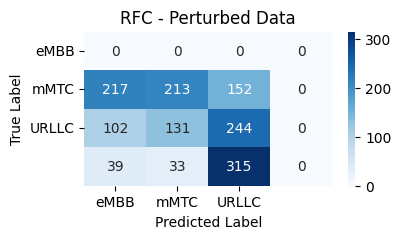

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         0
           1     0.5650    0.3660    0.4442       582
           2     0.3432    0.5115    0.4108       477
           3     0.0000    0.0000    0.0000       387

    accuracy                         0.3160      1446
   macro avg     0.2270    0.2194    0.2137      1446
weighted avg     0.3406    0.3160    0.3143      1446



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [30]:
X_test_perturbed = test_data_perturbed.drop('actual_label', axis=1)
y_test_perturbed = test_data_perturbed['actual_label']

# Make predictions
y_pred_on_perturbed = kmeans_model.predict(X_test_perturbed)

# Print confusion matrix
cm = confusion_matrix(y_test_perturbed, y_pred_on_perturbed)
plt.figure(figsize=(4,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['eMBB', 'mMTC', 'URLLC'], yticklabels=['eMBB', 'mMTC', 'URLLC'])
plt.title('RFC - Perturbed Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print(classification_report(y_test_perturbed, y_pred_on_perturbed, digits=4))

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp23 - Slice_Identification_UnSupML_undersampling_tsne_5GSliceNdd.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'